In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
used_car = pd.read_csv('UsedCarsSA_Clean_EN.csv')

In [67]:
df = used_car

In [68]:
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


In [ ]:
1. Make = Perusahaan pembuat mobil (merk mobil)
1. Type = Tipe mobil / jenis mobil
1. Year = Tahun pembuatan mobil
1. Origin = Negara asal perusahaan pembuat mobil
1. Color = Warna Mobil
1. Options = Kondisi mobil ( Full, Semi Full, Standard)
1. Engine_Size = kapasitas mesin mobil (*1000 cc)
1. Fuel_Type = Jenis Bahan Bakar ( Gas )
1. Gear_Type = Jenis transisi mobil (Manual dan Automatic)
1. Mileage = Jarak tempuh yang sudah dijangkau oleh mobil / (km mobil) (km)
1. Region = Asal Daerah / asal kota mobil bekas
1. Price = Harga Mobil bekas
1. Negotiable = Harga Mobil bekas dapat di nego atau tidak

1. Define Problem : 
1. Stakeholder yang mengalami masalah :Individual Insight : Penjual mobil bekas dan Pembeli mobil bekas
1.	Problem : 
    1. Apakah si penjual mobil bekas menjual mobil tersebut underpricing atau overpricing
    1. Apakah si pembeli mobil bekas membeli mobil tersebut underpricing atau overpricing
2.	Tujuan :
    1. Agar penjual dan pembeli sama sama tidak dirugikan dari segi materil
    1. Selain itu, pembeli dapat mencari mobil bekas yang sesuai dengan kebutuhan dan budget dari si pembeli
    1. Kemudian, Penjual dapat menentukan harga jual melalui fitur-fitur mobil bekas seperti kondisi mobilnya, jenis bahan bakar, mileage (km mobilnya), kapasitas mesin mobil, dan lain sebagainya, sehingga penjual tidak asal dalam menentukan harga jual.



Data Understanding
1. Data :
  1. Label : Price
  1. Features : Options, Engine_Size, Fuel_type, Gear_Type, Mileage, Negotiable 
1. ML Objective : Regression (numerical) -> KNN Regressor, Decision Tree regressor, Random Forest Regressor
1. Action : Read Dataset, EDA, Regression, Diagnostics and Collinearity, Assumption Summary, Conclusion
1. Value : Pembeli dan Penjual dapat membeli maupun menjual mobil bekas dengan harga yang sesuai (tidak overpricing maupun underpricing)

## Data Preparation

In [69]:
df = df[['Year','Price', 'Options', 'Engine_Size', 'Fuel_Type', 'Gear_Type', 'Mileage', 'Negotiable']]

In [70]:
df

,Year,Price,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Negotiable
0,2018,114000,Full,5.7,Gas,Automatic,103000,False
1,2016,0,Full,4.8,Gas,Automatic,5448,True
2,2019,27500,Standard,1.5,Gas,Automatic,72418,False
3,2019,43000,Standard,1.6,Gas,Automatic,114154,False
4,2019,59500,Semi Full,2.0,Gas,Automatic,41912,False
...,...,...,...,...,...,...,...,...
8030,2015,75000,Full,3.0,Gas,Automatic,77000,False
8031,2010,53000,Full,3.6,Gas,Automatic,150000,False
8032,2013,0,Full,4.6,Gas,Automatic,260,True
8033,2011,22000,Full,2.5,Gas,Automatic,18500,False


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         8035 non-null   int64  
 1   Price        8035 non-null   int64  
 2   Options      8035 non-null   object 
 3   Engine_Size  8035 non-null   float64
 4   Fuel_Type    8035 non-null   object 
 5   Gear_Type    8035 non-null   object 
 6   Mileage      8035 non-null   int64  
 7   Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 447.4+ KB


In [72]:
df.corr()

,Year,Price,Engine_Size,Mileage,Negotiable
Year,1.000000,0.292716,-0.236104,-0.214517,-0.190255
Price,0.292716,1.000000,0.155816,-0.102925,-0.505173
Engine_Size,-0.236104,0.155816,1.000000,0.050568,0.106581
Mileage,-0.214517,-0.102925,0.050568,1.000000,0.041496
Negotiable,-0.190255,-0.505173,0.106581,0.041496,1.000000


## EDA


In [73]:
df[['Year', 'Fuel_Type', 'Options', 'Gear_Type', 'Negotiable']].nunique()

Year          52
Fuel_Type      3
Options        3
Gear_Type      2
Negotiable     2
dtype: int64

In [74]:
df['Year'].unique()

array([2018, 2016, 2019, 2011, 2009, 2017, 2014, 2020, 2021, 2008, 2015,
       2013, 1993, 2012, 2010, 2006, 2007, 1992, 2001, 1982, 2003, 1996,
       1997, 1999, 2022, 2005, 1984, 1995, 2002, 2000, 1998, 1991, 2004,
       1986, 1983, 1994, 1989, 1990, 1979, 1985, 1988, 1980, 1987, 1964,
       1963, 1981, 1965, 1972, 1970, 1978, 1975, 1977], dtype=int64)

In [75]:
df['Fuel_Type'].unique()

array(['Gas', 'Diesel', 'Hybrid'], dtype=object)

In [76]:
df['Options'].unique()

array(['Full', 'Standard', 'Semi Full'], dtype=object)

## Preprocess

Preprocess

isi missing value, 
'Price'
pilihan:

>- Iterarive imputer 'Price'

encoding:

>- binary : 'Year' -> haruskah di encoding? ada 52 year haha
>- onehot : 'Options', 'Fuel_Type', 'Gear_Type', 'Negotiable'

scaling:
>- ???


## Missing Value

In [77]:
df['Price'].replace(0, np.nan, inplace = True)

C:\Users\amarz\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [78]:
df

,Year,Price,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Negotiable
0,2018,114000.0,Full,5.7,Gas,Automatic,103000,False
1,2016,NaN,Full,4.8,Gas,Automatic,5448,True
2,2019,27500.0,Standard,1.5,Gas,Automatic,72418,False
3,2019,43000.0,Standard,1.6,Gas,Automatic,114154,False
4,2019,59500.0,Semi Full,2.0,Gas,Automatic,41912,False
...,...,...,...,...,...,...,...,...
8030,2015,75000.0,Full,3.0,Gas,Automatic,77000,False
8031,2010,53000.0,Full,3.6,Gas,Automatic,150000,False
8032,2013,NaN,Full,4.6,Gas,Automatic,260,True
8033,2011,22000.0,Full,2.5,Gas,Automatic,18500,False


In [79]:
df[['Price','Year', 'Fuel_Type', 'Options', 'Gear_Type', 'Negotiable']].isna().sum()

Price         2527
Year             0
Fuel_Type        0
Options          0
Gear_Type        0
Negotiable       0
dtype: int64

<AxesSubplot:xlabel='Price'>

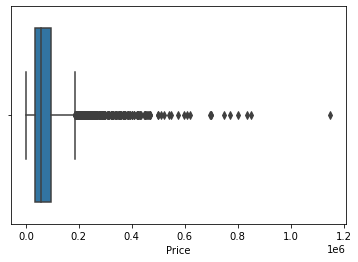

In [80]:
sns.boxplot(x= 'Price', data = df)

In [81]:
# Data Left Skew, sehingga missing value digunakan imputer Median

In [82]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [83]:
imp_iter = IterativeImputer(max_iter = 10, random_state = 0)
df[['Price']] = imp_iter.fit_transform(df[['Price']])

<ipython-input-83-841462c676ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Price']] = imp_iter.fit_transform(df[['Price']])
C:\Users\amarz\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [84]:
df

,Year,Price,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Negotiable
0,2018,114000.000000,Full,5.7,Gas,Automatic,103000,False
1,2016,78336.634168,Full,4.8,Gas,Automatic,5448,True
2,2019,27500.000000,Standard,1.5,Gas,Automatic,72418,False
3,2019,43000.000000,Standard,1.6,Gas,Automatic,114154,False
4,2019,59500.000000,Semi Full,2.0,Gas,Automatic,41912,False
...,...,...,...,...,...,...,...,...
8030,2015,75000.000000,Full,3.0,Gas,Automatic,77000,False
8031,2010,53000.000000,Full,3.6,Gas,Automatic,150000,False
8032,2013,78336.634168,Full,4.6,Gas,Automatic,260,True
8033,2011,22000.000000,Full,2.5,Gas,Automatic,18500,False


In [85]:
df.isna().sum()

Year           0
Price          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Negotiable     0
dtype: int64

## Encoding

In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [87]:
transformer = ColumnTransformer([
                                ('encoder', OneHotEncoder(), ['Options', 'Fuel_Type', 'Gear_Type', 'Negotiable'])
                                ])

In [88]:
df_encoded = pd.DataFrame(transformer.fit_transform(df))
df_encoded = df_encoded.astype(int)
df_encoded

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,1,0,1,0,1,0
1,1,0,0,0,1,0,1,0,0,1
2,0,0,1,0,1,0,1,0,1,0
3,0,0,1,0,1,0,1,0,1,0
4,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
8030,1,0,0,0,1,0,1,0,1,0
8031,1,0,0,0,1,0,1,0,1,0
8032,1,0,0,0,1,0,1,0,0,1
8033,1,0,0,0,1,0,1,0,1,0


In [89]:
transformer.get_feature_names()

['encoder__x0_Full',
 'encoder__x0_Semi Full',
 'encoder__x0_Standard',
 'encoder__x1_Diesel',
 'encoder__x1_Gas',
 'encoder__x1_Hybrid',
 'encoder__x2_Automatic',
 'encoder__x2_Manual',
 'encoder__x3_False',
 'encoder__x3_True']

In [90]:
df_encoded.columns = transformer.get_feature_names()
df_encoded = pd.concat([df[['Year', 'Price', 'Engine_Size', 'Mileage']],df_encoded], axis = 1)
df_encoded

,Year,Price,Engine_Size,Mileage,encoder__x0_Full,encoder__x0_Semi Full,encoder__x0_Standard,encoder__x1_Diesel,encoder__x1_Gas,encoder__x1_Hybrid,encoder__x2_Automatic,encoder__x2_Manual,encoder__x3_False,encoder__x3_True
0,2018,114000.000000,5.7,103000,1,0,0,0,1,0,1,0,1,0
1,2016,78336.634168,4.8,5448,1,0,0,0,1,0,1,0,0,1
2,2019,27500.000000,1.5,72418,0,0,1,0,1,0,1,0,1,0
3,2019,43000.000000,1.6,114154,0,0,1,0,1,0,1,0,1,0
4,2019,59500.000000,2.0,41912,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,2015,75000.000000,3.0,77000,1,0,0,0,1,0,1,0,1,0
8031,2010,53000.000000,3.6,150000,1,0,0,0,1,0,1,0,1,0
8032,2013,78336.634168,4.6,260,1,0,0,0,1,0,1,0,0,1
8033,2011,22000.000000,2.5,18500,1,0,0,0,1,0,1,0,1,0
